In [450]:
import numpy as np
df = np.loadtxt('machine-learning-ex1/ex1/ex1data2.txt', delimiter=',')

In [451]:
df[:5]

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05],
       [1.416e+03, 2.000e+00, 2.320e+05],
       [3.000e+03, 4.000e+00, 5.399e+05]])

In [452]:
X = np.c_[ np.ones(len(df)), df[ : , :(df.shape[1]-1)] ]

In [453]:
y = df[ : , df.shape[1]-1 ]

In [454]:
def loss(X, y, theta):
    return (X.dot(theta) - y).dot(X.dot(theta) - y)/2/len(X)

In [455]:
def gradient_descent_step(X, y, theta, alfa):
    return theta - alfa / len(X) * (X.dot(theta) - y).dot(X)

In [456]:
def find_mean(X):
    return 1/len(X) * np.transpose(X).dot(np.ones(len(X)))

In [457]:
def find_standard_deviation(X):
    return np.sqrt(np.transpose(X - find_mean(X)).dot((X - find_mean(X)))/len(X))

In [458]:
def normalize(X, indices_to_normalize):
    temp = np.copy(X)
    mean = find_mean(X)
    sd = find_standard_deviation(X)
    for i in indices_to_normalize: # don't normalize the bias!
        temp[:,i] = (X[:,i] - mean[i])/sd[i, i]
    return temp, mean, sd

In [462]:
def normalize_with_learned_stats(X, indices_to_normalize, mean, sd):
    temp = np.copy(X)
    for i in indices_to_normalize: # don't normalize the bias!
        temp[:,i] = (X[:,i] - mean[i])/sd[i, i]
    return temp

In [463]:
alfa = 0.1
iterations = 1000

theta = np.ones(X.shape[1]) # init theta
losses = np.zeros(iterations)
X_normalized, mean, sd = normalize(X, [1,2])

for i in range(iterations):
    theta = gradient_descent_step(X_normalized, y, theta, alfa)
    losses[i] = loss(X_normalized, y, theta)
    
theta

array([340412.65957447, 109447.79646964,  -6578.35485416])

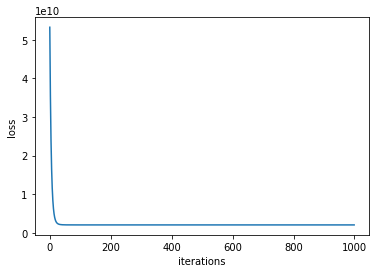

In [464]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.show()

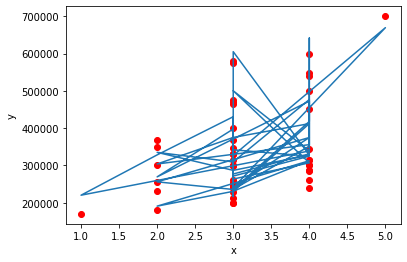

In [465]:
# 2D PLOT OF LINEAR REGRESSION

import matplotlib.pyplot as plt

plt.plot(X[:,2], y, 'ro')
plt.plot(X[:,2], X_normalized.dot(theta))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

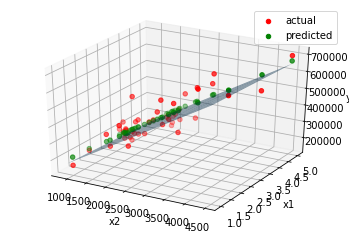

In [466]:
# 3D PLOT OF LINEAR REGRESSION

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# create a wiremesh for the plane that the predicted values will lie
xx, yy, zz = np.meshgrid(X[:, 0], X[:, 1], X[:, 2])
combinedArrays = np.vstack((xx.flatten(), yy.flatten(), zz.flatten())).T
Z = normalize_with_learned_stats(combinedArrays, [1], mean, sd).dot(theta)

# graph the original data, predicted data, and wiremesh plane
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], y, color='r', label='actual')
ax.scatter(X[:, 1], X[:, 2], X_normalized.dot(theta), color='g', label='predicted')
ax.plot_trisurf(combinedArrays[:, 1], combinedArrays[:, 2], Z, alpha=0.5)
ax.set_xlabel('x2')
ax.set_ylabel('x1')
ax.set_zlabel('y')
ax.legend()
plt.show()